**Kaitlyn Stark "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."**

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()


import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm


from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from scipy.spatial import distance
from scipy.cluster import hierarchy

from sklearn.preprocessing import Imputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

from sklearn import linear_model


from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import RFE


from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import pairwise_distances

##### Import the calibration data

In [2]:
df = pd.read_excel('data/calibration.xlsx')
df.head(15)

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194
5,611B52LL,1,0,0,1,0,0,15,2,0,77,0,,0,,0.0,,54,92
6,612W26VA,1,0,1,0,0,0,15,4,0,67,1,1,1,,NaN,,63,129
7,594Y59EZ,0,1,1,0,0,1,15,6,1,76,5,NaN,1,1,0.0,,50,483
8,610K33YD,1,1,0,0,0,1,25,4,1,,,NaN,,0,NaN,,51,168
9,716W84WL,1,0,1,1,0,0,15,3,1,54,3,,0,,NaN,,51,90


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


In [4]:
df = df.replace(r'\s+', np.nan, regex=True)
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,NaN,0.0,1.0,NaN,NaN,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,NaN,0.0,1.0,0.0,NaN,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,NaN,1.0,1.0,0.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,NaN,1.0,1.0,0.0,NaN,65,194


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         7223 non-null float64
INCOME      7272 non-null float64
CHILD       582 non-null float64
GNDR        8718 non-null float64
OWNHOME     7217 non-null float64
SPORT       4273 non-null float64
COMP        1009 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(7), int64(11), object(1)
memory usage: 1.3+ MB


In [6]:
df.describe()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
count,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,7223.000000,7272.000000,582.0,8718.000000,7217.000000,4273.000000,1009.0,9216.000000,9216.000000
mean,0.500000,0.337023,0.510525,0.636719,0.291124,0.480252,19.963108,6.378038,0.489475,61.392912,2.882151,1.0,0.447236,0.718581,0.056869,1.0,58.228516,112.111220
std,0.500027,0.472718,0.499916,0.480971,0.454305,0.499637,8.820188,2.873927,0.499916,16.594747,1.843857,0.0,0.497237,0.449722,0.250085,0.0,12.902173,92.292223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,0.000000,12.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,4.000000,0.000000,48.000000,1.000000,1.0,0.000000,0.000000,0.000000,1.0,52.000000,56.000000
50%,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000,15.000000,6.000000,0.000000,63.000000,3.000000,1.0,0.000000,1.000000,0.000000,1.0,61.000000,81.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,9.000000,1.000000,75.000000,4.000000,1.0,1.000000,1.000000,0.000000,1.0,67.000000,132.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000,24.000000,1.000000,97.000000,6.000000,1.0,1.000000,1.000000,3.000000,1.0,99.000000,600.000000


##### Columns with null values

In [7]:
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
CHILD       8634
GNDR         498
OWNHOME     1999
SPORT       4943
COMP        8207
PCTMARR        0
HOMEVAL        0
dtype: int64

##### Drop CHILD column

In [8]:
df = df.drop(['CHILD', 'OWNHOME', 'COMP'], axis=1)
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,SPORT,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,0.0,NaN,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,0.0,NaN,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,0.0,0.0,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,1.0,0.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,1.0,0.0,65,194


In [9]:
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
GNDR         498
SPORT       4943
PCTMARR        0
HOMEVAL        0
dtype: int64

##### Cleaning the data

In [10]:
df['AGE'].median()

63.0

In [11]:
df = df.fillna({'AGE': 63.0})

In [12]:
df['INCOME'].median()

3.0

In [13]:
df = df.fillna({'INCOME': 3.0})

In [14]:
df['GNDR'].median()

0.0

In [15]:
df = df.fillna({'GNDR': 0.0})

In [16]:
df['SPORT'].median()

0.0

In [17]:
df = df.fillna({'SPORT': 0.0})

In [18]:
df.isnull().sum()

FAKEID      0
Y2defect    0
Y1G5        0
Y1G4        0
Y1G3        0
Y1G2        0
Y1G1        0
Y1price     0
YEARS       0
BACKER      0
AGE         0
INCOME      0
GNDR        0
SPORT       0
PCTMARR     0
HOMEVAL     0
dtype: int64

##### Pivot tables and charts

In [19]:
df.groupby(['GNDR', 'Y2defect']).size()

GNDR  Y2defect
0.0   0           2675
      1           2642
1.0   0           1933
      1           1966
dtype: int64

In [20]:
df.groupby(['INCOME', 'Y2defect']).size().sort_values(ascending=False)

INCOME  Y2defect
3.0     1           1631
        0           1546
4.0     0            790
        1            767
1.0     0            661
        1            626
2.0     0            445
0.0     0            441
        1            434
2.0     1            408
5.0     0            383
        1            380
6.0     1            362
        0            342
dtype: int64

In [21]:
df.groupby(['Y2defect', 'AGE']).size().sort_values(ascending=False).head()

Y2defect  AGE 
1         63.0    1090
0         63.0    1028
          69.0     102
          75.0     101
1         71.0      96
dtype: int64

In [22]:
#The relationship between INCOME and variable Y2defect
df.pivot_table(index=['INCOME'], columns=['Y2defect'])

AGE               BACKER                GNDR            \
Y2defect          0          1         0         1         0         1   
INCOME                                                                   
0.0       68.097506  68.663594  0.643991  0.470046  0.342404  0.354839   
1.0       67.611195  65.316294  0.644478  0.445687  0.443268  0.421725   
2.0       61.507865  61.122549  0.602247  0.428922  0.426966  0.431373   
3.0       61.545925  61.196199  0.606080  0.378296  0.371928  0.396689   
4.0       58.963291  58.397653  0.518987  0.362451  0.460759  0.474576   
5.0       58.796345  57.678947  0.483029  0.384211  0.509138  0.486842   
6.0       57.587719  57.502762  0.535088  0.328729  0.482456  0.486188   

             HOMEVAL                PCTMARR               ...         Y1G3  \
Y2defect           0           1          0          1    ...            0   
INCOME                                                    ...                
0.0        78.294785   86.186636  54.571429  54.635945    ...     0.666667   
1.0        77.459909   80.990415  57.515885  56.268371    ...     0.633888   
2.0        93.235955   83.806373  59.238202  59.051471    ...     0.622472   
3.0       110.133247  118.853464  58.032988  56.838136    ...     0.673997   
4.0       117.689873  112.199478  59.798734  59.551499    ...     0.675949   
5.0       154.224543  163.539474  60.553525  60.676316    ...     0.605744   
6.0       159.184211  179.276243  61.809942  61.969613    ...     0.657895   

                        Y1G4                Y1G5              Y1price  \
Y2defect         1         0         1         0         1          0   
INCOME                                                                  
0.0       0.578341  0.478458  0.500000  0.399093  0.290323  18.696145   
1.0       0.599042  0.514372  0.554313  0.382753  0.271565  18.956127   
2.0       0.580882  0.483146  0.534314  0.417978  0.316176  19.808989   
3.0       0.628449  0.483829  0.502759  0.375809  0.281422  20.329884   
4.0       0.625815  0.506329  0.559322  0.370886  0.301173  20.822785   
5.0       0.636842  0.522193  0.536842  0.381201  0.294737  21.214099   
6.0       0.649171  0.502924  0.508287  0.409357  0.287293  21.491228   

                        YEARS            
Y2defect          1         0         1  
INCOME                                   
0.0       19.550691  7.167800  6.619816  
1.0       19.345048  7.223903  6.391374  
2.0       19.558824  6.800000  6.161765  
3.0       19.586143  6.785252  5.817290  
4.0       19.308996  6.405063  5.627119  
5.0       21.052632  6.532637  5.965789  
6.0       21.284530  6.485380  5.770718  

[7 rows x 26 columns]

In [23]:
#The relationship between GNDR and variable Y2defect
df.pivot_table(index=['GNDR'], columns=['Y2defect'])

AGE               BACKER               HOMEVAL              \
Y2defect          0          1         0         1           0           1   
GNDR                                                                         
0.0       61.773832  61.389478  0.602991  0.399697  107.458318  113.985617   
1.0       62.489912  61.429807  0.558717  0.387589  112.011381  116.021363   

            INCOME              PCTMARR               ...         Y1G3  \
Y2defect         0         1          0          1    ...            0   
GNDR                                                  ...                
0.0       2.802617  2.831567  58.060561  57.193793    ...     0.655701   
1.0       3.010347  3.048830  59.195034  58.897253    ...     0.656492   

                        Y1G4                Y1G5              Y1price  \
Y2defect         1         0         1         0         1          0   
GNDR                                                                    
0.0       0.617335  0.494953  0.524224  0.389159  0.288796  19.889720   
1.0       0.617497  0.497672  0.525941  0.379721  0.288911  20.558717   

                        YEARS            
Y2defect          1         0         1  
GNDR                                     
0.0       19.392506  6.853084  5.998107  
1.0       20.244151  6.673564  5.951679  

[2 rows x 26 columns]

In [24]:
df1 = df[['INCOME', 'GNDR', 'Y2defect']]
df1.head()

,INCOME,GNDR,Y2defect
0,4.0,0.0,0
1,3.0,0.0,1
2,2.0,0.0,1
3,4.0,1.0,1
4,4.0,1.0,0


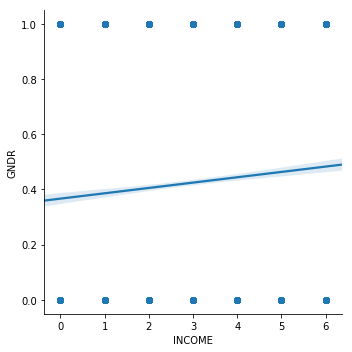

In [82]:
sns.lmplot('INCOME', 'GNDR', df)

##### Correlation

In [25]:
df.corr()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,SPORT,PCTMARR,HOMEVAL
Y2defect,1.000000,-0.101921,0.028869,-0.040159,-0.109634,-0.141604,-0.023498,-0.139099,-0.189929,-0.022697,0.010530,0.007248,0.011944,-0.023869,0.029722
Y1G5,-0.101921,1.000000,0.092901,-0.150656,0.116103,0.123291,0.043975,0.121479,0.045319,0.028507,-0.000865,-0.005599,0.005457,0.008064,-0.000382
Y1G4,0.028869,0.092901,1.000000,-0.082485,-0.076326,-0.094967,-0.003481,-0.095750,-0.090743,-0.061787,0.006825,0.002400,0.017533,0.001259,0.001030
Y1G3,-0.040159,-0.150656,-0.082485,1.000000,-0.091538,-0.135977,-0.045239,-0.100829,0.005308,-0.025990,0.020746,0.000198,-0.002252,-0.006574,0.001812
Y1G2,-0.109634,0.116103,-0.076326,-0.091538,1.000000,0.206763,0.061990,0.320802,0.276530,0.096830,-0.013631,-0.009714,0.003123,0.019234,-0.013760
Y1G1,-0.141604,0.123291,-0.094967,-0.135977,0.206763,1.000000,-0.003982,0.244241,0.256153,0.085067,-0.028290,-0.025717,0.004151,0.024756,-0.014693
Y1price,-0.023498,0.043975,-0.003481,-0.045239,0.061990,-0.003982,1.000000,0.043768,-0.090287,-0.029670,0.071470,0.042429,0.010261,0.008032,0.095580
YEARS,-0.139099,0.121479,-0.095750,-0.100829,0.320802,0.244241,0.043768,1.000000,0.533836,0.281932,-0.089712,-0.020403,-0.022063,0.023691,-0.049689
BACKER,-0.189929,0.045319,-0.090743,0.005308,0.276530,0.256153,-0.090287,0.533836,1.000000,0.182871,-0.084987,-0.029201,-0.020048,0.032558,-0.064727
AGE,-0.022697,0.028507,-0.061787,-0.025990,0.096830,0.085067,-0.029670,0.281932,0.182871,1.000000,-0.217381,0.012516,-0.020217,-0.053910,-0.014759


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000091C0978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000012951DD8>]], dtype=object)

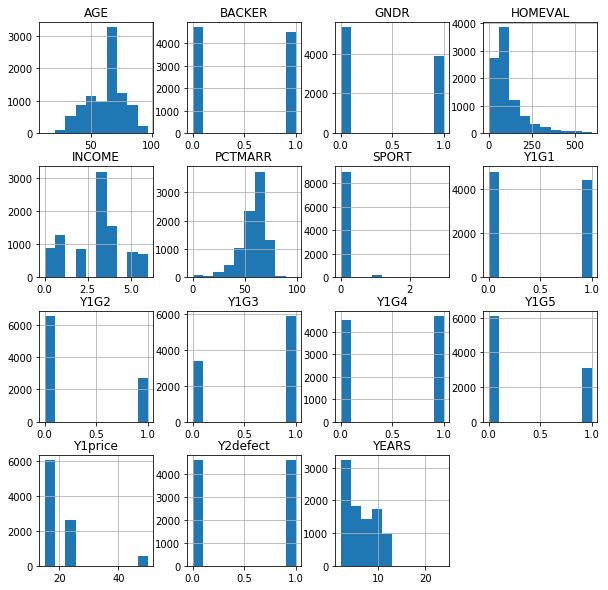

In [26]:
df.hist(figsize=(10,10))

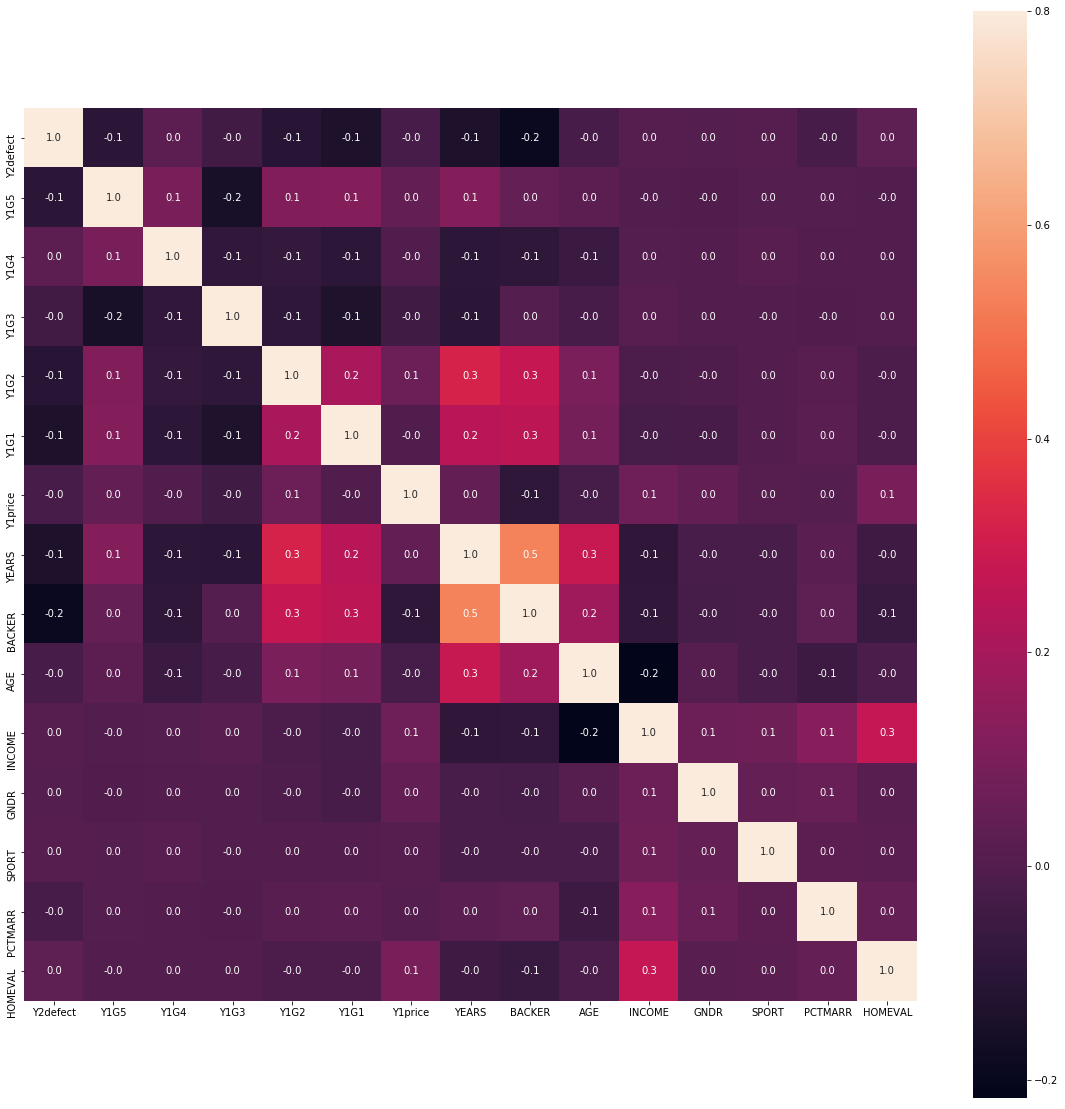

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

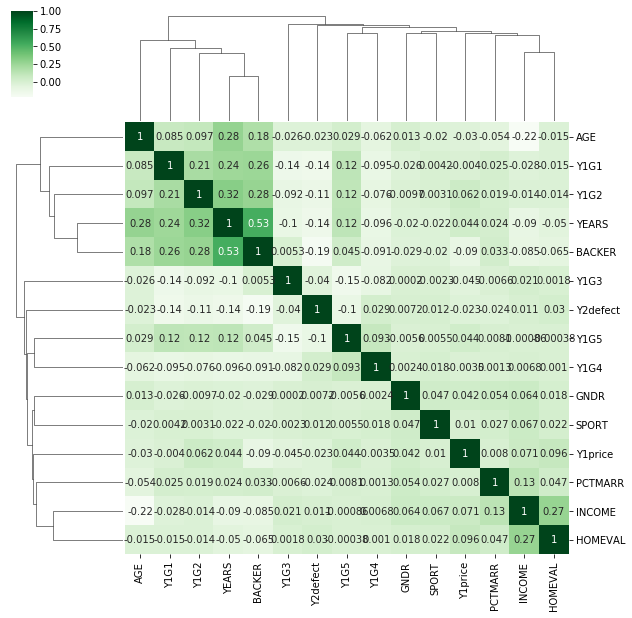

In [28]:
sns.clustermap(data=df.corr(), annot=True, cmap='Greens')

##### Decision Tree Analysis

In [29]:
y = df['Y2defect']
X = df.drop(['Y2defect','FAKEID', 'AGE'], axis=1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.538155515371
--------------------------------------------------------
[[732 631]
 [646 756]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.53      0.54      0.53      1363
          1       0.55      0.54      0.54      1402

avg / total       0.54      0.54      0.54      2765

--------------------------------------------------------
0.538140147761


##### KNN

In [32]:
y = df['Y2defect']
X = df.drop(['Y2defect', 'FAKEID'], axis=1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [34]:
print metrics.accuracy_score(y_test, knn.predict(X_test))
print metrics.confusion_matrix(y_test, knn.predict(X_test))
print metrics.classification_report(y_test, knn.predict(X_test))
print metrics.roc_auc_score(y_test, knn.predict(X_test))

0.511392405063
[[728 635]
 [716 686]]
             precision    recall  f1-score   support

          0       0.50      0.53      0.52      1363
          1       0.52      0.49      0.50      1402

avg / total       0.51      0.51      0.51      2765

0.511708459668


##### Logistical Regression

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.588065099458
[[838 525]
 [614 788]]
             precision    recall  f1-score   support

          0       0.58      0.61      0.60      1363
          1       0.60      0.56      0.58      1402

avg / total       0.59      0.59      0.59      2765

0.588437228862


###### The best model based off the highest score is the Logistical Regression

##### Import the validation data

In [37]:
ks = pd.read_excel('data/validation.xlsx')
ks.head(15)

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110
5,059D43VJ,NaN,0,0,0,0,1,15,1,0,69.0,6,,0,1,0.0,,69,192
6,874Y07FS,NaN,1,0,1,1,0,50,11,1,72.0,1,,1,1,0.0,,56,55
7,789T58LZ,NaN,0,1,1,0,0,15,3,0,64.0,3,1,1,1,NaN,1,58,319
8,958H17RR,NaN,0,0,0,1,1,25,6,0,NaN,,NaN,0,0,NaN,,53,57
9,309O88WT,NaN,0,1,0,1,1,15,8,1,66.0,2,NaN,0,0,NaN,,77,79


In [38]:
ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 19 columns):
FAKEID      9542 non-null object
Y3defect    0 non-null float64
Y2G5        9542 non-null int64
Y2G4        9542 non-null int64
Y2G3        9542 non-null int64
Y2G2        9542 non-null int64
Y2G1        9542 non-null int64
Y2price     9542 non-null int64
YEARS       9542 non-null int64
BACKER      9542 non-null int64
AGE         7055 non-null float64
INCOME      9542 non-null object
CHILD       4810 non-null object
GNDR        9542 non-null object
OWNHOME     9542 non-null object
SPORT       4180 non-null float64
COMP        9542 non-null object
PCTMARR     9542 non-null int64
HOMEVAL     9542 non-null int64
dtypes: float64(3), int64(10), object(6)
memory usage: 1.4+ MB


In [39]:
ks.describe()

,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,SPORT,PCTMARR,HOMEVAL
count,0.0,9542.000000,9542.000000,9542.000000,9542.000000,9542.00000,9542.000000,9542.000000,9542.000000,7055.000000,4180.000000,9542.000000,9542.000000
mean,NaN,0.171872,0.613708,0.433871,0.586984,0.52599,21.128694,6.001467,0.484804,62.111410,0.072967,58.126808,112.767554
std,NaN,0.377289,0.486924,0.495634,0.492401,0.49935,9.731992,3.119228,0.499795,16.448692,0.297853,13.039348,93.453839
min,NaN,0.000000,0.000000,0.000000,0.000000,0.00000,15.000000,1.000000,0.000000,8.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.00000,15.000000,3.000000,0.000000,49.000000,0.000000,52.000000,55.000000
50%,NaN,0.000000,1.000000,0.000000,1.000000,1.00000,15.000000,6.000000,0.000000,63.000000,0.000000,61.000000,81.000000
75%,NaN,0.000000,1.000000,1.000000,1.000000,1.00000,25.000000,9.000000,1.000000,76.000000,0.000000,67.000000,134.000000
max,NaN,1.000000,1.000000,1.000000,1.000000,1.00000,50.000000,19.000000,1.000000,98.000000,4.000000,90.000000,600.000000


##### Cleaning the data

In [40]:
ks = ks.replace(r'\s+', np.nan, regex=True)
ks.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4.0,NaN,0.0,1.0,0.0,NaN,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5.0,NaN,0.0,NaN,0.0,NaN,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4.0,1.0,0.0,1.0,NaN,NaN,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4.0,NaN,1.0,1.0,0.0,NaN,65,110


In [41]:
ks.isnull().sum()

FAKEID         0
Y3defect    9542
Y2G5           0
Y2G4           0
Y2G3           0
Y2G2           0
Y2G1           0
Y2price        0
YEARS          0
BACKER         0
AGE         2487
INCOME      2415
CHILD       8941
GNDR         565
OWNHOME     1952
SPORT       5362
COMP        8586
PCTMARR        0
HOMEVAL        0
dtype: int64

##### Dropping rows that are irrelevant or have too many null values - CHILD, COMP, AGE, Y3defect, FAKEID

In [42]:
ks = ks.drop(['CHILD','COMP','AGE','Y3defect','FAKEID'], axis=1)
ks.head()

,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,INCOME,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL
0,0,0,1,1,0,15,5,0,4.0,0.0,1.0,0.0,66,64
1,1,1,1,1,1,25,9,1,5.0,0.0,NaN,0.0,67,128
2,1,0,1,1,0,15,5,1,NaN,0.0,0.0,NaN,52,113
3,0,0,1,1,0,15,1,0,4.0,0.0,1.0,NaN,65,81
4,0,1,0,1,0,25,9,1,4.0,1.0,1.0,0.0,65,110


In [43]:
ks.isnull().sum()

Y2G5          0
Y2G4          0
Y2G3          0
Y2G2          0
Y2G1          0
Y2price       0
YEARS         0
BACKER        0
INCOME     2415
GNDR        565
OWNHOME    1952
SPORT      5362
PCTMARR       0
HOMEVAL       0
dtype: int64

In [44]:
ks['INCOME'].median()

3.0

In [45]:
ks = ks.fillna({'INCOME': 3.0})

In [46]:
ks['GNDR'].median()

0.0

In [47]:
ks = ks.fillna({'GNDR': 0.0})

In [48]:
ks['SPORT'].median()

0.0

In [49]:
ks = ks.fillna({'SPORT': 0.0})

In [50]:
ks['OWNHOME'].median()

1.0

In [51]:
ks = ks.fillna({'OWNHOME': 1.0})

In [52]:
ks.isnull().sum()

Y2G5       0
Y2G4       0
Y2G3       0
Y2G2       0
Y2G1       0
Y2price    0
YEARS      0
BACKER     0
INCOME     0
GNDR       0
OWNHOME    0
SPORT      0
PCTMARR    0
HOMEVAL    0
dtype: int64

##### Correlation

In [53]:
ks.corr()

,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,INCOME,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL
Y2G5,1.000000,0.007713,0.057423,0.021634,0.096453,0.089316,0.105501,0.180600,0.001872,-0.022314,0.026857,-0.028305,0.007308,0.015538
Y2G4,0.007713,1.000000,-0.052441,-0.148794,0.050348,-0.019234,0.100296,0.053399,-0.001639,0.012756,0.010112,0.001954,0.004612,-0.013398
Y2G3,0.057423,-0.052441,1.000000,0.001669,-0.005759,0.019278,0.069078,0.063429,-0.003015,0.015621,0.066489,0.004927,-0.003324,-0.015174
Y2G2,0.021634,-0.148794,0.001669,1.000000,-0.101482,-0.029676,-0.044439,0.047534,-0.010112,-0.009436,-0.043147,-0.006404,0.000061,0.016080
Y2G1,0.096453,0.050348,-0.005759,-0.101482,1.000000,-0.022213,0.185428,0.104893,-0.011470,0.008415,0.014536,-0.005684,0.011760,-0.024720
Y2price,0.089316,-0.019234,0.019278,-0.029676,-0.022213,1.000000,0.015137,-0.116282,0.095756,0.031009,-0.036114,0.016967,-0.015772,0.086208
YEARS,0.105501,0.100296,0.069078,-0.044439,0.185428,0.015137,1.000000,0.492478,-0.083416,-0.015038,0.034823,-0.020529,0.020784,-0.051347
BACKER,0.180600,0.053399,0.063429,0.047534,0.104893,-0.116282,0.492478,1.000000,-0.087741,-0.015101,0.030775,-0.024971,0.010910,-0.047955
INCOME,0.001872,-0.001639,-0.003015,-0.010112,-0.011470,0.095756,-0.083416,-0.087741,1.000000,0.045519,-0.025002,0.070586,0.158039,0.281014
GNDR,-0.022314,0.012756,0.015621,-0.009436,0.008415,0.031009,-0.015038,-0.015101,0.045519,1.000000,0.083006,0.046474,0.060438,0.002466


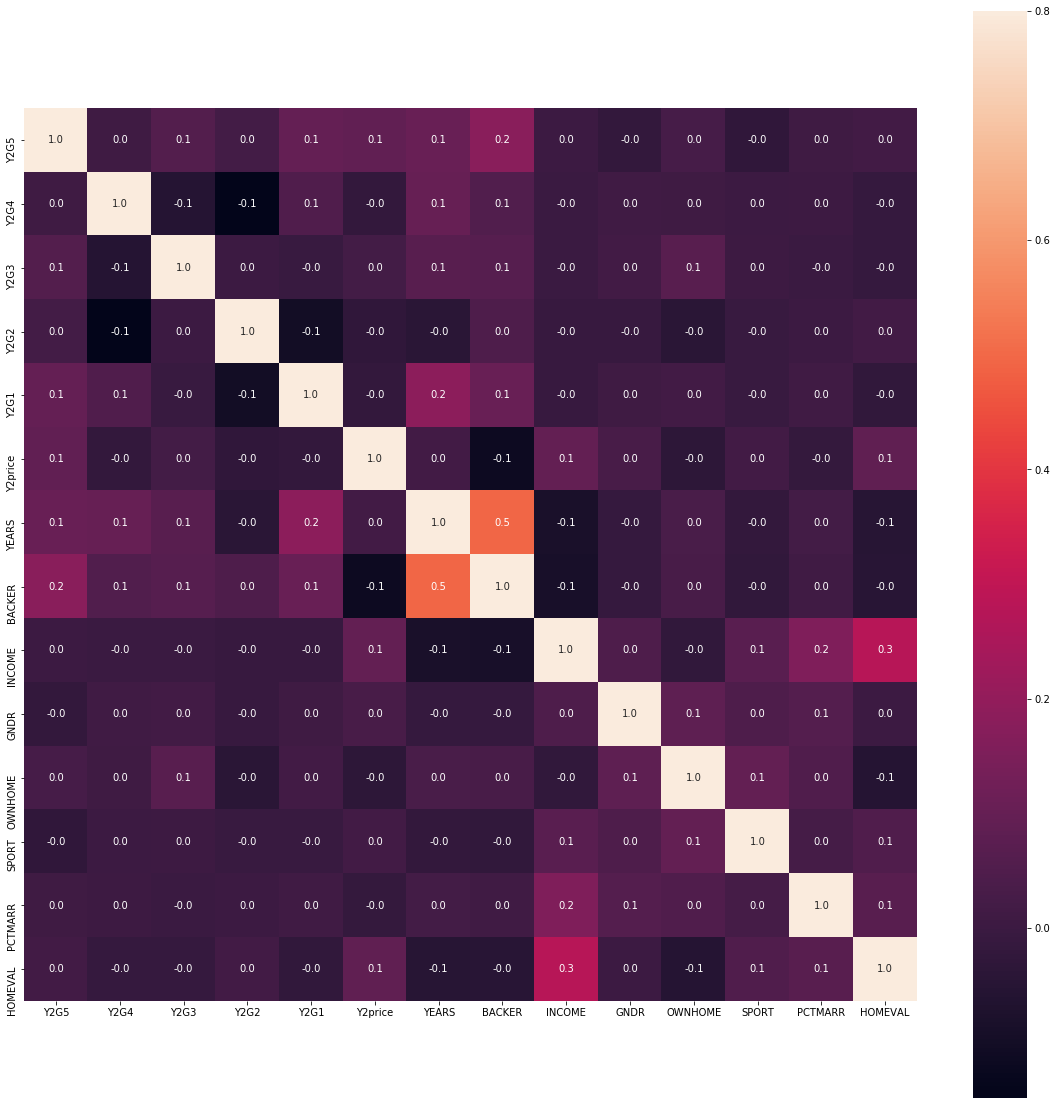

In [54]:
plt.figure(figsize=(20,20))
sns.heatmap(ks.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000163875C0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000017E7F828>]], dtype=object)

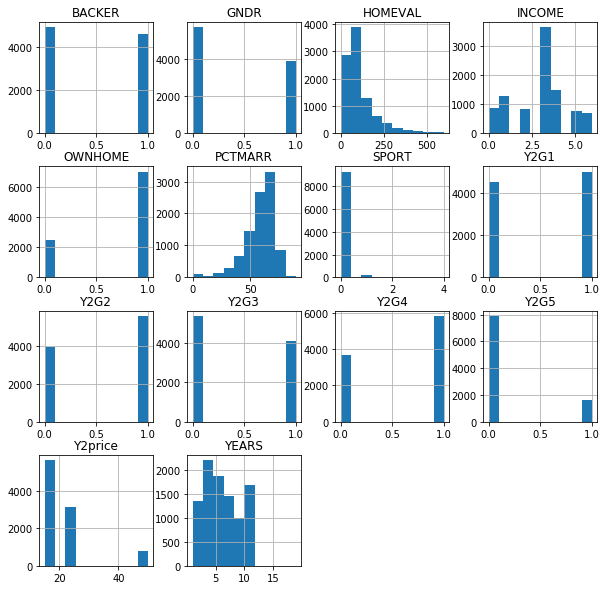

In [55]:
ks.hist(figsize=(10,10))

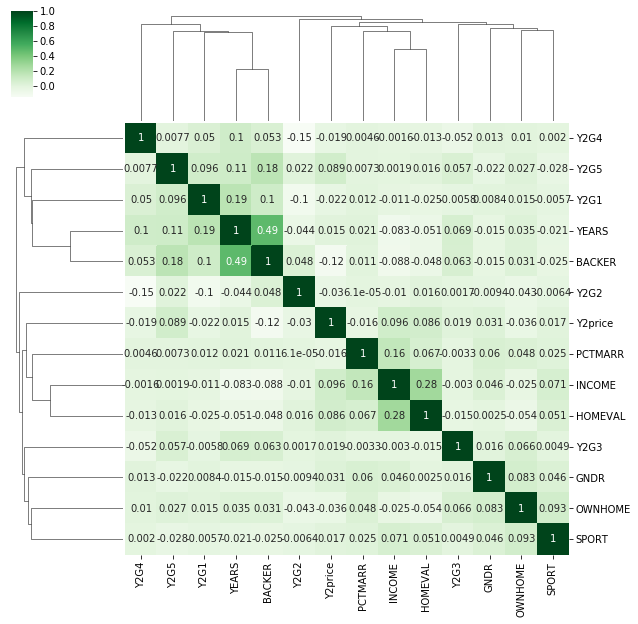

In [56]:
sns.clustermap(data=ks.corr(), annot=True, cmap='Greens')

##### Predictions

In [57]:
predictions = lr.predict(ks)
print predictions

[1 0 0 ..., 1 1 1]


In [58]:
predictions = pd.DataFrame(predictions, columns=['predict Y3defect'])
predictions.head()

,predict Y3defect
0,1
1,0
2,0
3,1
4,0


In [59]:
predictions13 = ks.join(predictions) 
predictions13.head(10)

,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,INCOME,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL,predict Y3defect
0,0,0,1,1,0,15,5,0,4.0,0.0,1.0,0.0,66,64,1
1,1,1,1,1,1,25,9,1,5.0,0.0,1.0,0.0,67,128,0
2,1,0,1,1,0,15,5,1,3.0,0.0,0.0,0.0,52,113,0
3,0,0,1,1,0,15,1,0,4.0,0.0,1.0,0.0,65,81,1
4,0,1,0,1,0,25,9,1,4.0,1.0,1.0,0.0,65,110,0
5,0,0,0,0,1,15,1,0,6.0,0.0,1.0,0.0,69,192,1
6,1,0,1,1,0,50,11,1,1.0,1.0,1.0,0.0,56,55,0
7,0,1,1,0,0,15,3,0,3.0,1.0,1.0,0.0,58,319,1
8,0,0,0,1,1,25,6,0,3.0,0.0,0.0,0.0,53,57,1
9,0,1,0,1,1,15,8,1,2.0,0.0,0.0,0.0,77,79,0


In [60]:
probability = lr.predict_proba(ks)
probability = pd.DataFrame(probability, columns=['probability of no', 'probility of yes'])

In [61]:
probability

,probability of no,probility of yes
0,0.440677,0.559323
1,0.768744,0.231256
2,0.667827,0.332173
3,0.414207,0.585793
4,0.521447,0.478553
5,0.369565,0.630435
6,0.762688,0.237312
7,0.315915,0.684085
8,0.483025,0.516975
9,0.609727,0.390273


##### Performing clustering analysis

In [68]:
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)

In [69]:
k_means.fit(ks)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [70]:
k_means.labels_

array([3, 0, 0, ..., 3, 3, 3])

In [71]:
k_means.cluster_centers_

array([[  1.59983633e-01,   6.21112930e-01,   4.12847791e-01,
          5.97790507e-01,   5.21276596e-01,   2.15650573e+01,
          5.92103110e+00,   4.56219313e-01,   3.32078560e+00,
          4.07937807e-01,   7.22585925e-01,   4.05073650e-02,
          6.16816694e+01,   1.30805646e+02],
       [  1.80555556e-01,   5.88888889e-01,   3.94444444e-01,
          6.38888889e-01,   4.94444444e-01,   2.32916667e+01,
          5.45000000e+00,   4.22222222e-01,   3.97222222e+00,
          4.08333333e-01,   6.55555556e-01,   5.00000000e-02,
          5.67611111e+01,   4.46430556e+02],
       [  2.00966184e-01,   6.11594203e-01,   4.50241546e-01,
          5.71014493e-01,   5.00483092e-01,   2.28357488e+01,
          5.74879227e+00,   4.46376812e-01,   3.62608696e+00,
          3.97101449e-01,   6.91787440e-01,   4.83091787e-02,
          5.75178744e+01,   2.47251208e+02],
       [  1.71137998e-01,   6.12484657e-01,   4.42398738e-01,
          5.81974399e-01,   5.34630896e-01,   2.04953533e+0

In [72]:
ks1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
ks1.head()

,cluster
0,3
1,0
2,0
3,3
4,0


In [73]:
ks2 = df.join(ks1)
ks2.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,SPORT,PCTMARR,HOMEVAL,cluster
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,0.0,0.0,77,203,3
1,298S54OK,1,0,0,1,0,1,15,3,1,63.0,3.0,0.0,0.0,53,68,0
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,0.0,0.0,50,38,0
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,1.0,0.0,60,68,3
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,1.0,0.0,65,194,0


##### Developing a profile for each cluster

In [74]:
ks2.groupby('cluster').mean()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,SPORT,PCTMARR,HOMEVAL
cluster,,,,,,,,,,,,,,,
0,0.512278,0.319221,0.504234,0.645216,0.286622,0.480525,19.944962,6.346317,0.490686,61.916596,2.881033,0.415326,0.024979,58.352244,110.149026
1,0.478386,0.354467,0.527378,0.590778,0.285303,0.495677,19.596542,6.573487,0.481268,61.126801,2.752161,0.400576,0.040346,58.380403,105.368876
2,0.488048,0.355578,0.519920,0.630478,0.275896,0.507968,19.830677,6.403386,0.497012,62.780876,2.965139,0.399402,0.024900,58.386454,108.273904
3,0.498274,0.340178,0.510449,0.637107,0.296202,0.474105,20.018172,6.374705,0.488097,61.513720,2.917318,0.432128,0.026349,58.137016,114.078684


In [75]:
ks2.groupby(['cluster']).count()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,SPORT,PCTMARR,HOMEVAL
cluster,,,,,,,,,,,,,,,,
0,2362,2362,2362,2362,2362,2362,2362,2362,2362,2362,2362,2362,2362,2362,2362,2362
1,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347
2,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004
3,5503,5503,5503,5503,5503,5503,5503,5503,5503,5503,5503,5503,5503,5503,5503,5503


##### Using Hierarchical Clustering Analysis (HCA) and visualizing the results using dendrogram

In [76]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

In [77]:
np.random.seed(1)

agg= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)
agg.labels_

array([1, 2, 2, ..., 0, 2, 1], dtype=int64)

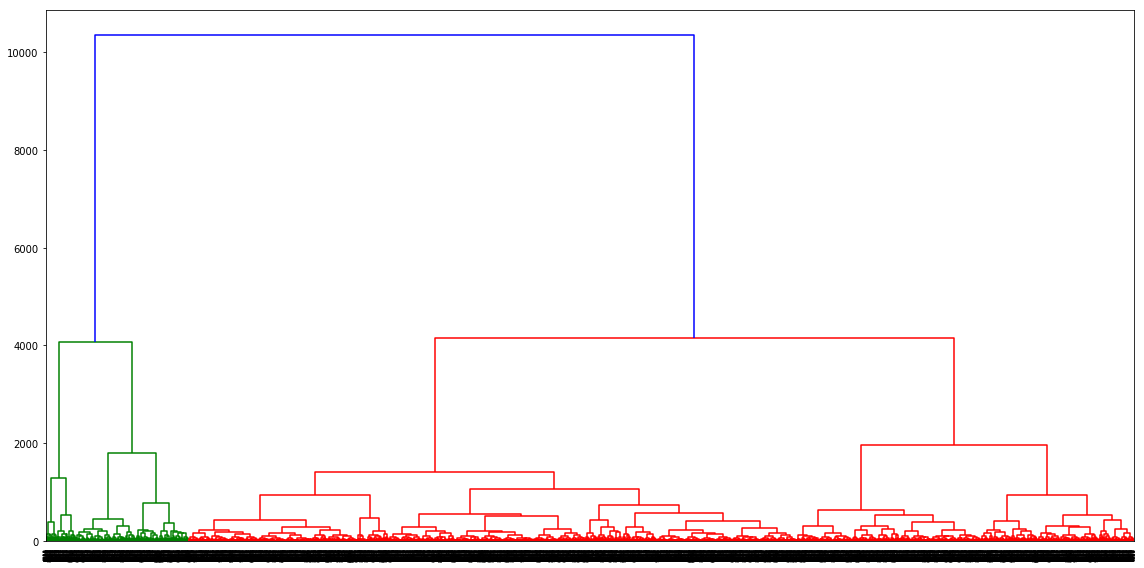

In [78]:
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="top")
plt.tight_layout()